# fetching data 

In [1]:
import gdown

In [2]:
# a file
url = "https://drive.google.com/uc?id=1HCXDm5ES-s6vpUx6eZC4K9z5mDIvoslJ"
output = "dataset.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1HCXDm5ES-s6vpUx6eZC4K9z5mDIvoslJ
To: /content/dataset.csv
100%|██████████| 239M/239M [00:04<00:00, 49.6MB/s]


'dataset.csv'

# EDA

In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("dataset.csv",   encoding = 'latin',header=None)

## Discover your data 

## Visualize 

In [5]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
"""check every column"""
for i in range(6):
    print(f"unique values: {df[i].unique()}")
    print(f"number of them {len(df[i].unique())}")
    print("\n")
#--------------------------------------------
"""
* 1st column : onye 2 values representing positive or negative.
* 2nd column : i think it's the ID
* 3rd column : data of publication of the message
* 4th column : useless has only 1 value which is NO_Query, so we can probably delete it.
* 5th column : the message  sent!

"""

unique values: [0 4]
number of them 2


unique values: [1467810369 1467810672 1467810917 ... 2193601991 2193602064 2193602129]
number of them 1598315


unique values: ['Mon Apr 06 22:19:45 PDT 2009' 'Mon Apr 06 22:19:49 PDT 2009'
 'Mon Apr 06 22:19:53 PDT 2009' ... 'Tue Jun 16 08:38:58 PDT 2009'
 'Tue Jun 16 08:39:00 PDT 2009' 'Tue Jun 16 08:40:50 PDT 2009']
number of them 774363


unique values: ['NO_QUERY']
number of them 1


unique values: ['_TheSpecialOne_' 'scotthamilton' 'mattycus' ... 'EvolveTom'
 'AmandaMarie1028' 'bpbabe']
number of them 659775


unique values: ["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'
 ... 'Are you ready for your MoJo Makeover? Ask me for details '
 'Happy 38th Birthday to my boo

"\n* 1st column : onye 2 values representing positive or negative.\n* 2nd column : i think it's the ID\n* 3rd column : data of publication of the message\n* 4th column : useless has only 1 value which is NO_Query, so we can probably delete it.\n* 5th column : the message  sent!\n\n"

In [7]:
# check for weird text (non ascii)
is_ascii = df[5].apply(lambda text: text.isascii())
is_ascii[is_ascii==False]
#14538 messages contain non ascii characters 

194        False
226        False
270        False
372        False
447        False
           ...  
1599682    False
1599911    False
1599933    False
1599980    False
1599996    False
Name: 5, Length: 14538, dtype: bool

In [8]:
print(df.isnull().sum().sum()) # no null values
df.nunique()
"""
We can see that there is probably duplicates in the messages sent, which can lead 
to some bias issues.
"""

0


'\nWe can see that there is probably duplicates in the messages sent, which can lead \nto some bias issues.\n'

In [9]:
# we will rename the columns to make it more clear
df.columns
df.rename(columns={0: 'type', 1: 'id', 2:'date', 3:'useless', 4:'user', 5:'message'}, inplace=True)

In [10]:
duplicates_ = df.groupby(["message"]).nunique()

In [11]:
duplicates_[duplicates_["id"]> 1] 
# we can see that we have 6762 duplicates

,type,id,date,useless,user
message,,,,,
David must be hospitalized for five days end of July (palatine tonsils). I will probably never see Katie in concert.,1,2,2,1,1
bathroom is clean..... now on to more enjoyable tasks......,1,2,1,1,2
#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH,1,2,2,1,1
#seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day #seb-day,1,2,2,1,2
*tear*,1,2,2,1,2
...,...,...,...,...,...
youtube is down,1,2,2,1,2
youtube.,1,2,2,1,2
yuckkk its pouring rain &amp; im filthy now!! walking through that was horrible,1,2,2,1,2


In [12]:
duplicates_.sort_values(by="id", ascending=False)
# sometimes it's comming from the same user sometimes it's not apparently
# we can also see the number of copies of each message
# we can also see that some messages like Good morning have 2 types sometimes which is not good

,type,id,date,useless,user
message,,,,,
isPlayer Has Died! Sorry,1,210,210,1,1
good morning,1,118,118,1,114
headache,1,115,115,1,114
Good morning,2,112,112,1,105
Headache,1,106,106,1,105
...,...,...,...,...,...
@lostgirl66 help me sleep yoo!!! Last i winked was saturday,1,1,1,1,1
@lostgirl66 hehe yes! N crap sites r visited!!! Or i for example come up with weird thoughts on me blog!!! Or drives or pics!!!,1,1,1,1,1
@lostgirl66 didn sleep at all i suppose.. so tired... so so tired ! hows you today? x,1,1,1,1,1


In [13]:
# check the one message different type thing
duplicates_[duplicates_["type"]>1]
# so we have 2225 messages that are the same byt with a different type, we will need to probably
# delete them or processe them one by one and decide manyaly what label to give them

,type,id,date,useless,user
message,,,,,
"British weather is back i see! Oh well Birtney, london and ciaraaaa in 5 dayssss",2,1,1,1,1
I love you,2,2,2,1,2
"Raining tomorrow afternoon but its going to be very nice at 5 59! ! Hope it changes, I want it to be nicee in the afternoon&amp;nitee!",2,1,1,1,1
That is all.,2,2,2,1,2
Uhm.. science! -.- Verrrry boring and LONG Grrr.,2,1,1,1,1
...,...,...,...,...,...
"yay finished lord of the flies study questions now, i think i will work on my japanese hw *sigh*",2,1,1,1,1
yay i dont have glandular fever! but i do have bad tonsilitis... at least its not a kissing disease! yes tayla i heard u told teachers,2,1,1,1,1
yay no work todayyy but working for the rest of the week lol,2,1,1,1,1


Text(0.5, 1.0, 'distribution of type')

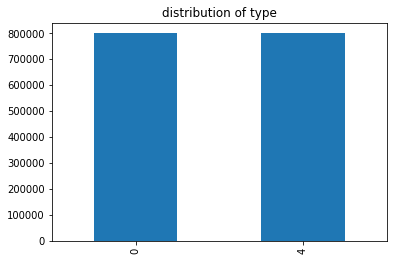

In [14]:
import matplotlib.pyplot as plt
# check the distribution of  the type 
pd.value_counts(df["type"]).plot.bar()
plt.title("distribution of type")
# nice its equaly distributed 

# Do the neccessary data preprocessing 




In [15]:
# rename columns (i already did it before but it might be more clean to do it here)
# remoe duplicates!
df = df.drop_duplicates(subset="message", keep=False).reset_index(drop=True)
# check if it removed them
duplicates_ = df.groupby("message").nunique()
duplicates_[duplicates_["id"]>1]

,type,id,date,useless,user
message,,,,,


In [16]:
#keep the ascii only
df["is_ascii"] = df["message"].apply(lambda text: text.isascii())
df  = df[df['is_ascii']==True]
df

,type,id,date,useless,user,message,is_ascii
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",True
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,True
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,True
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,True
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",True
...,...,...,...,...,...,...,...
1573026,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha...",True
1573027,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,True
1573029,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,True
1573030,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,True


In [17]:
# type has 2 value 0 and 4, it's better to have them consequetive
df.type = df.type.replace(4,1)
df["type"].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([0, 1])

In [18]:
df.nunique()

type              2
id          1558655
date         764354
useless           1
user         646434
message     1558655
is_ascii          1
dtype: int64

In [19]:
# keep only useful columns
# the data isnt relevant for our text classification
# the user also is not and the id too so we only keep message and type
df = df[["type","message"]]

In [20]:
df.shape
# size of the data IS VERY LARGe, soo we will not use it all because we lack time
# and ressources that's why the  test_size = 0.9 instead of 0.2 in a normal case.
from sklearn.model_selection import train_test_split

x_train,x_rem,y_train,y_rem = train_test_split(df["message"], df["type"], test_size=0.999,random_state=123)

x_valid,x_test,y_valid,y_test = train_test_split(x_rem, y_rem, test_size=0.999,random_state=123)
x_test, _ , y_test, _ = train_test_split(x_test,y_test, test_size=0.99, random_state=123)

In [21]:
x_train.shape


(1558,)

## Tokenization 

In [22]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 26.2 MB/s 
     |████████████████████████████████| 596 kB 45.2 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 6.6 MB 59.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_valid= x_valid.reset_index(drop=True)

y_train =   y_train.reset_index(drop=True)
y_test =  y_test.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)


In [24]:
# import BERT tokenizer and initialize it

from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
import torch
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_fnc(text):
    return tokenizer(text, truncation=True)

tokenized_train = tokenizer(list(x_train), truncation=True , padding=True)
tokenized_valid = tokenizer(list(x_valid), truncation=True, padding=True)
#data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
#data_collator(x_train)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [25]:
import torch
class BertDataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
    item["labels"] = torch.tensor([self.labels[idx]])
    return item

  def __len__(self):
    return len(self.labels)

In [26]:
TRAIN = BertDataset(tokenized_train, y_train)
VALID = BertDataset(tokenized_valid, y_valid)

# Build the Model

In [27]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(torch_device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

In [28]:
#define metrucs to be used later when training
from sklearn.metrics import accuracy_score, f1_score

def get_metrics(prediction):
  labels = prediction.label_ids
  predictions = prediction.predictions.argmax(-1)

  accuracy = accuracy_score(labels, predictions)
  f1 = f1_score(labels, predictions)
  return {
    'accuracy': accuracy,
    'f1': f1,
    }

In [29]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    evaluation_strategy="steps"
)


# Train the Model 

In [30]:
import timeit
start_time = timeit.default_timer()
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=TRAIN,
    eval_dataset=VALID,
    tokenizer=tokenizer,
    compute_metrics = get_metrics
)

trainer.train()

time_used = timeit.default_timer() - start_time
print(time_used," seconds")

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1558
  Num Epochs = 5
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 1950


Step,Training Loss,Validation Loss,Accuracy,F1
500,0.541200,0.697855,0.792550,0.770759
1000,0.373800,0.847477,0.808606,0.814214
1500,0.157500,1.021969,0.803468,0.800261


***** Running Evaluation *****
  Num examples = 1557
  Batch size = 4
Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1557
  Batch size = 4
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1557
  Batch size = 4
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Mod

128.46395816299997  seconds


# Evaluate 

In [31]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 1557
  Batch size = 4


{'epoch': 5.0,
 'eval_accuracy': 0.8086062941554271,
 'eval_f1': 0.814214463840399,
 'eval_loss': 0.8474774956703186,
 'eval_runtime': 4.2092,
 'eval_samples_per_second': 369.9,
 'eval_steps_per_second': 92.653}

# Predict 

In [32]:
tokenized_test =  tokenizer(list(x_test), truncation=True , padding=True)
TEST = BertDataset(tokenized_test, y_test)

In [33]:
predictions = trainer.predict(TEST)
predictions = predictions[0]
metrics = predictions[2]


***** Running Prediction *****
  Num examples = 15555
  Batch size = 4


# Plot confusion matrix 
discuss results of classification report (precision ,recall,f1-score) 

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = [prediction.argmax() for prediction in predictions]
confusion_mat = confusion_matrix(y_test, predictions)


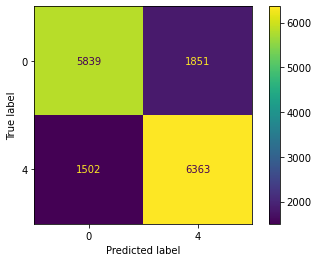

In [35]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=np.array([0,4]))
cm.plot()
plt.show()


#Extra ( OPTIONAL ) 

Using HuggingFace transformers pipline do entity tagging to the following text

In [36]:
text = "Abraham Lincoln was a president who lived in the United States."